In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import sys
sys.path.insert(0, 'E:/MyRepositories/JobProjects/Аналитика_базы_данных/functions/')
from out_dataframe import MyFrame


In [14]:
warnings.simplefilter(action="ignore", category=Warning)
# 'E:\MyRepositories\JobProjects\Аналитика_базы_данных\functions\out_dataframe.py'

In [15]:
product = "водяной насос"  # изделие по которому будет формироваться диаграмма
# наименование столбца по которому строим диаграмму
value_column = "Месяц регистрации"
# список столбцов датафрейма
# ['Месяц регистрации',
# 'Обозначение изделия',
# 'Дата изготовления изделия',
# 'Транспортное средство (установка)',
# 'Пробег, наработка',
# 'Причины возникновения дефектов',
# 'Пояснения к причинам возникновения дефектов',
# 'Поставщик дефектного комплектующего']

In [16]:
# создаем датафреймы по годам
df6 = MyFrame(2024, "ММЗ - эксплуатация", product).get_frame()
df5 = MyFrame(2024, "ММЗ - АСП", product).get_frame()
df4 = MyFrame(2023, "ММЗ - эксплуатация", product).get_frame()
df3 = MyFrame(2023, "ММЗ - АСП", product).get_frame()
df2 = MyFrame(2022, "ММЗ - эксплуатация", product).get_frame()
df1 = MyFrame(2022, "ММЗ - АСП", product).get_frame()


In [17]:
# создаем сводный датафрейм из датафреймов по годам
# df = pd.concat([df1, df2, df3, df4])
df = pd.concat([df1, df2, df3, df4, df5, df6])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 523 entries, 25 to 909
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Месяц регистрации                            523 non-null    datetime64[ns]
 1   Обозначение изделия                          523 non-null    object        
 2   Дата изготовления изделия                    193 non-null    datetime64[ns]
 3   Транспортное средство (установка)            329 non-null    object        
 4   Пробег, наработка                            523 non-null    int32         
 5   Причины возникновения дефектов               331 non-null    object        
 6   Пояснения к причинам возникновения дефектов  436 non-null    object        
 7   Поставщик дефектного комплектующего          297 non-null    object        
dtypes: datetime64[ns](2), int32(1), object(5)
memory usage: 24.5+ KB


In [30]:
df[df['Обозначение изделия'].str.contains('факт')]['Обозначение изделия']

588    245-1307010-А1-11       (факт 240-1307010-А1)
589    245-1307010-А1-11       (факт 240-1307010-А1)
Name: Обозначение изделия, dtype: object

In [11]:
df['Обозначение изделия'] = df['Обозначение изделия'].replace({'245-1307010-А1-11       (факт 240-1307010-А1)': '240-1307010-А1'})

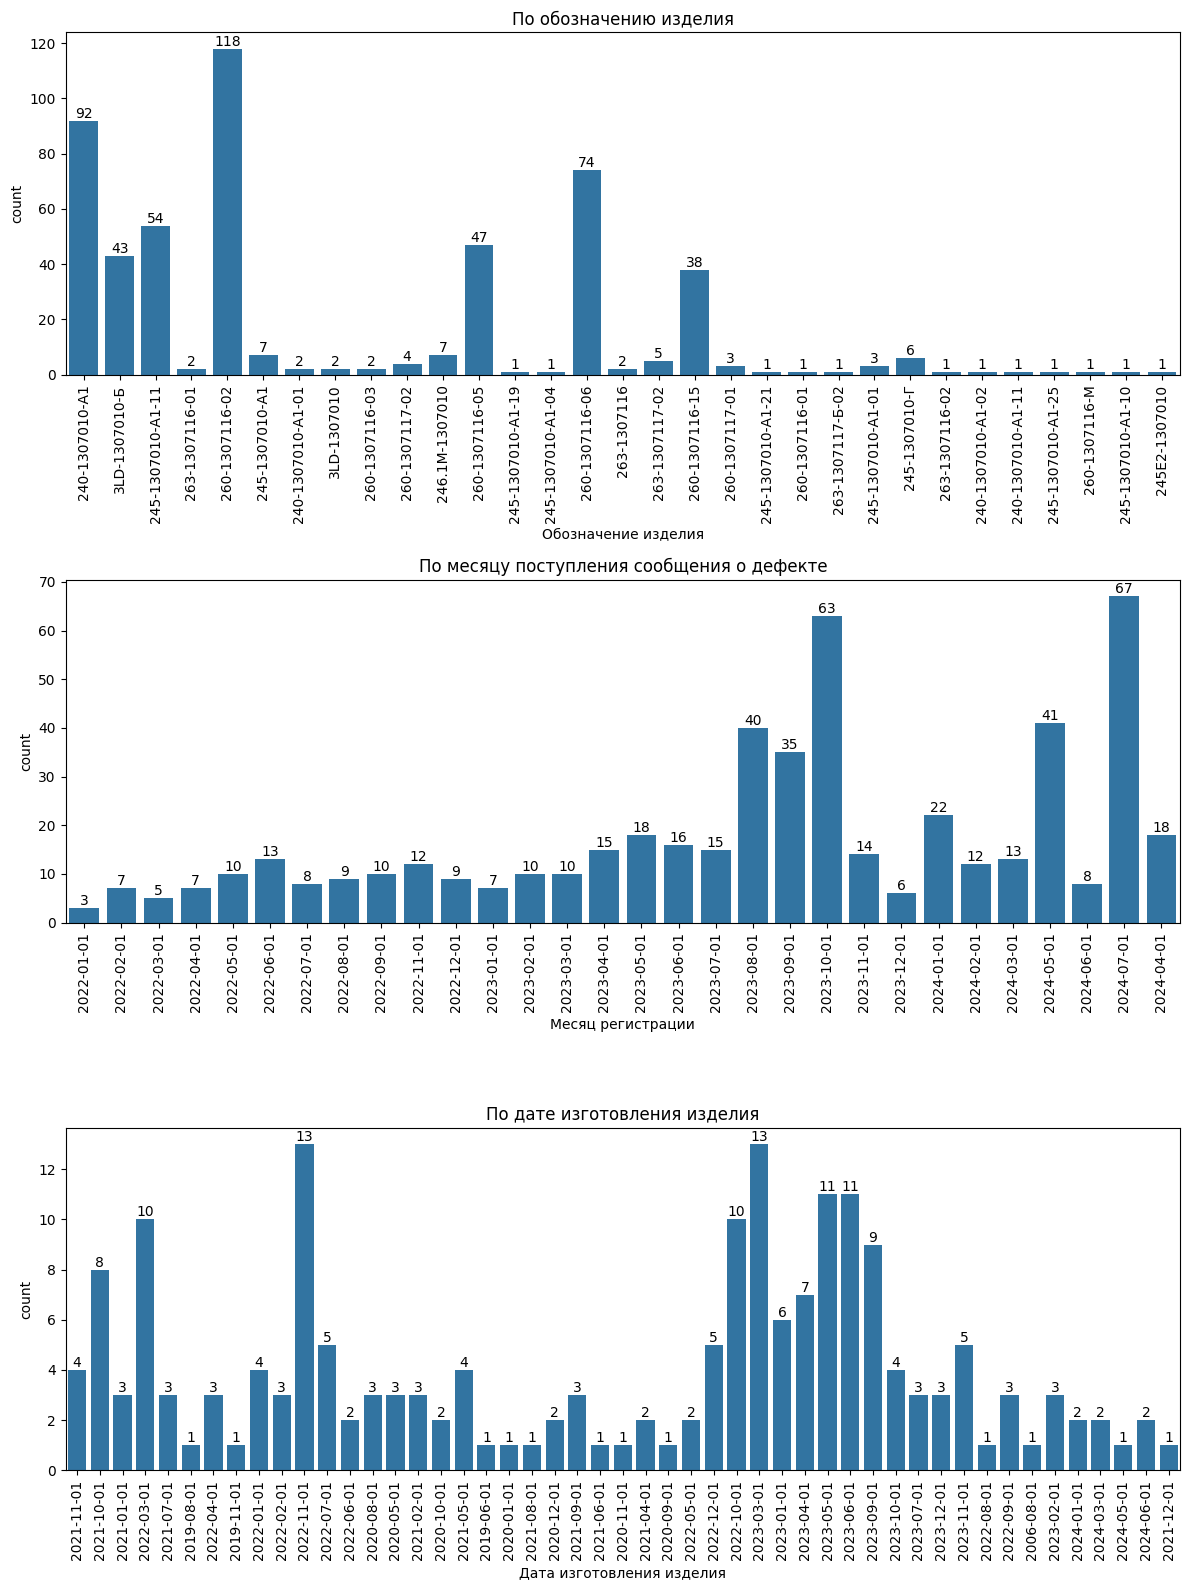

In [12]:
# Создание фигуры с несколькими графиками
fig, ax = plt.subplots(3, figsize=(12, 16))

# Построение графика countplot по обозначению изделия
ax_1 = sns.countplot(data=df, x='Обозначение изделия', ax=ax[0])
ax_1.bar_label(ax_1.containers[0], label_type='edge')
ax[0].set_title('По обозначению изделия')
# Поворот подписей по оси Х на 90 градусов
ax[0].tick_params(axis='x', labelrotation=90)

# Построение графика countplot по месяцу поступления сообщения
ax_2 = sns.countplot(data=df, x='Месяц регистрации', ax=ax[1])
ax_2.bar_label(ax_2.containers[0], label_type='edge')
ax[1].set_title('По месяцу поступления сообщения о дефекте')
ax[1].tick_params(axis='x', labelrotation=90)

# Удаляем пустые строки в столбце 'Дата изготовления изделия'
df_new = df.dropna(subset=['Дата изготовления изделия'])
# Построение графика countplot по дате изготовления изделия
ax_3 = sns.countplot(data=df_new, x='Дата изготовления изделия', ax=ax[2])
ax_3.bar_label(ax_3.containers[0], label_type='edge')
ax[2].set_title('По дате изготовления изделия')
ax_3.tick_params(axis='x', labelrotation=90)

# Установка расстояния между подграфиками
plt.tight_layout();

# Сохранение графика в файл
plt.savefig('countplot.png')